In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('house_data.csv')


In [3]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [5]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


C:\Users\phsud\AppData\Local\Temp\ipykernel_20940\3746533019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


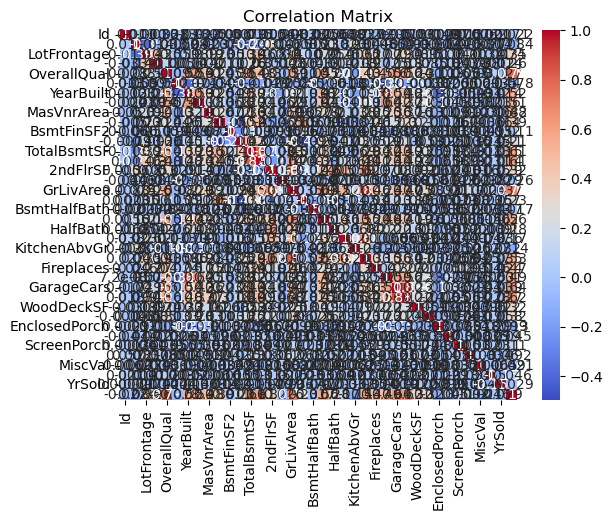

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
X = df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]
y = df['SalePrice']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:

 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=101)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('house_data.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with the mean
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

# Impute categorical columns with the mode
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Update the feature list after encoding
target = 'SalePrice'  # Replace with your target column name
features = df_encoded.columns.drop(target)

# Split the data into features (X) and target (y)
X = df_encoded[features]
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

Missing values in each column:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Model coefficients: [ 4.04968908e-01  4.97635927e+00  9.19869404e+00  6.62633301e-01
  6.65164993e+03  5.83502708e+03  3.18143380e+02  1.30711760e+02
  2.38839451e+01  1.67397901e+01  6.64916556e+00 -1.54675958e+00
  2.18422644e+01  1.69964209e+01  3.25383063e+01 -2.46321380e+01
  2.49023133e+01  1.68402090e+03 -2.47349296e+03  2.98541170e+03
  2.12627669e+03 -2.57266468e+03 -1.27343579e+04  1.97044770e+03
  2.80793681e+03  2.19552118e+01  7.26178149e+02  2.52819259e+01
  1.68524231e+01  4.78087600e-01 -5.19341653e+00  5.09409591e+01
  3.32932154e+01

In [11]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2632190987.38933
R-squared: 0.6568345444131233


In [13]:
# Model Evaluation
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2632190987.38933
R-squared: 0.6568345444131233


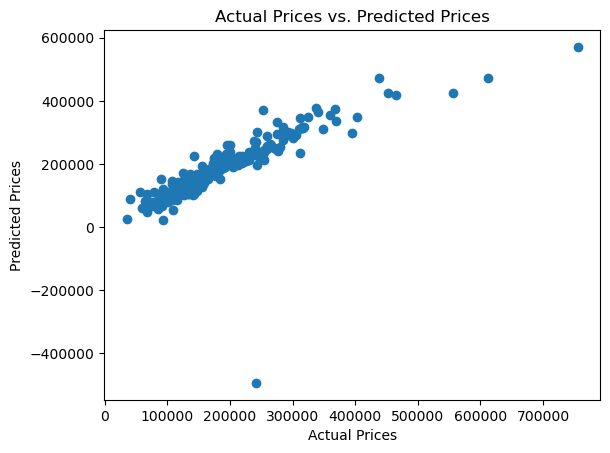

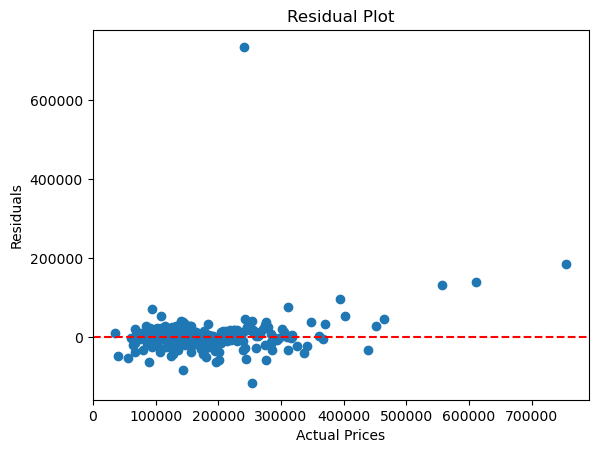

Checking for NaN values in processed new data:
Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 246, dtype: int64
Predicted Price: -452797.76542275376


C:\Users\phsud\AppData\Local\Temp\ipykernel_20940\2722071373.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_encoded[col] = 0
C:\Users\phsud\AppData\Local\Temp\ipykernel_20940\2722071373.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df_encoded[col] = 0
C:\Users\phsud\AppData\Local\Temp\ipykernel_20940\2722071373.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('house_data.csv')

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define target and features
target = 'SalePrice'
features = df_encoded.columns.drop(target)

# Split data
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Plot predictions vs. actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Function to preprocess new data
def preprocess_new_data(new_data, encoded_cols):
    new_df = pd.DataFrame(new_data)
    # One-hot encode categorical variables
    new_df_encoded = pd.get_dummies(new_df, drop_first=True)
    
    # Add missing columns with default value 0
    missing_cols = set(encoded_cols) - set(new_df_encoded.columns)
    for col in missing_cols:
        new_df_encoded[col] = 0
        
    # Ensure the order of columns matches the training data
    new_df_encoded = new_df_encoded[encoded_cols]
    
    return new_df_encoded

# Define new data
new_data = [{
    'MSZoning': 'RL', 'Street': 'Pave', 'Alley': 'NoAlley', 'LotShape': 'Reg', 
    'LandContour': 'Lvl', 'Utilities': 'AllPub', 'LotConfig': 'Inside', 
    'LandSlope': 'Gtl', 'Neighborhood': 'CollgCr', 'Condition1': 'Norm', 
    'Condition2': 'Norm', 'BldgType': '1Fam', 'HouseStyle': '2Story', 
    'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'VinylSd', 
    'Exterior2nd': 'VinylSd', 'MasVnrType': 'None', 'ExterQual': 'TA', 
    'ExterCond': 'TA', 'Foundation': 'PConc', 'BsmtQual': 'Gd', 'BsmtCond': 'TA', 
    'BsmtExposure': 'No', 'BsmtFinType1': 'GLQ', 'BsmtFinType2': 'Unf', 
    'Heating': 'GasA', 'HeatingQC': 'Ex', 'CentralAir': 'Y', 'Electrical': 'SBrkr', 
    'KitchenQual': 'TA', 'Functional': 'Typ', 'FireplaceQu': 'NoFP', 
    'GarageType': 'Attchd', 'GarageFinish': 'RFn', 'GarageQual': 'TA', 
    'GarageCond': 'TA', 'PavedDrive': 'Y', 'PoolQC': 'NoPool', 'Fence': 'MnPrv', 
    'MiscFeature': 'Shed', 'SaleType': 'WD', 'SaleCondition': 'Normal', 
    'OverallQual': 7, 'OverallCond': 5, 'YearBuilt': 2003, 'YearRemodAdd': 2003, 
    'MasVnrArea': 0, 'BsmtFinSF1': 706, 'BsmtFinSF2': 0, 'BsmtUnfSF': 150, 
    'TotalBsmtSF': 856, '1stFlrSF': 856, '2ndFlrSF': 854, 'LowQualFinSF': 0, 
    'GrLivArea': 1710, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 2, 
    'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1, 'TotRmsAbvGrd': 8, 
    'Fireplaces': 0, 'GarageCars': 2, 'GarageArea': 548, 'WoodDeckSF': 0, 
    'OpenPorchSF': 61, 'EnclosedPorch': 0, '3SsnPorch': 0, 'ScreenPorch': 0, 
    'PoolArea': 0, 'MiscVal': 400, 'MoSold': 6, 'YrSold': 2006
}]

# Process the new data
new_data_processed = preprocess_new_data(new_data, features)

# Check for NaN values
print("Checking for NaN values in processed new data:")
print(new_data_processed.isnull().sum())

# Fill NaN values if any
new_data_processed.fillna(0, inplace=True)

# Make predictions
predicted_price = model.predict(new_data_processed)

print("Predicted Price:", predicted_price[0])